# **INTRODUCTION TO MACHINE LEARNING**
## **Supervised Machine Learning**

#### **Load the Required Libraries**

In [ ]:
#pip install catboost
#pip install lime

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
import lime
import lime.lime_tabular
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

### **Initialize Data Importation Process**

In [ ]:
uploaded = files.upload()

Saving Mortality3.csv to Mortality3.csv


#### **Read the Dataset as DataFrame**

In [ ]:
df = pd.read_csv('Mortality3.csv')
df.head()

,Maternal_Age,Prenatal_Visits,Birth_Weight_kg,Gestational_Age_weeks,Maternal_Health_Score,Socioeconomic_Status,Delivery_Method,Multiple_Birth,Maternal_Nutrition_Score,Mortality
0,17,3,3.26,31,7.57,2,1,0,2.62,0
1,22,5,4.10,32,5.96,3,1,0,6.13,1
2,35,8,1.90,29,4.39,3,1,0,1.43,1
3,38,8,4.35,34,6.81,3,1,0,1.72,1
4,18,4,4.09,33,8.81,1,1,0,8.78,1


### **Display Variables Definition and their Measurements**

In [ ]:
import pandas as pd

# Define the variables, their inferred definitions, and measurements
variable_info = [
    {'Variable Name': 'Maternal_Age', 'Definition': 'Age of the mother at the time of delivery', 'Measurement': 'Integer (years)'},
    {'Variable Name': 'Prenatal_Visits', 'Definition': 'Number of prenatal care visits', 'Measurement': 'Integer (count)'},
    {'Variable Name': 'Birth_Weight_kg', 'Definition': 'Birth weight of the baby in kilograms', 'Measurement': 'Float (kg)'},
    {'Variable Name': 'Gestational_Age_weeks', 'Definition': 'Gestational age at birth in weeks', 'Measurement': 'Integer (weeks)'},
    {'Variable Name': 'Maternal_Health_Score', 'Definition': 'A composite score reflecting the mother\'s overall health during pregnancy', 'Measurement': 'Float (score)'},
    {'Variable Name': 'Socioeconomic_Status', 'Definition': 'Socioeconomic status (e.g., 1=Low, 2=Middle, 3=High)', 'Measurement': 'Integer (categorical)'},
    {'Variable Name': 'Delivery_Method', 'Definition': 'Method of delivery (e.g., 0=Vaginal, 1=C-section)', 'Measurement': 'Integer (categorical)'},
    {'Variable Name': 'Multiple_Birth', 'Definition': 'Indicates if it was a multiple birth (e.g., 0=Single, 1=Multiple)', 'Measurement': 'Integer (binary)'},
    {'Variable Name': 'Maternal_Nutrition_Score', 'Definition': 'A score reflecting the mother\'s nutritional status during pregnancy', 'Measurement': 'Float (score)'},
    {'Variable Name': 'Mortality', 'Definition': 'Target variable: indicates infant mortality (e.g., 0=No Mortality, 1=Mortality)', 'Measurement': 'Integer (binary)'}
]

# Create a DataFrame
variables_df = pd.DataFrame(variable_info)

# Display the DataFrame as HTML
from IPython.display import HTML, display
display(HTML(variables_df.to_html(index=False)))


Variable Name,Definition,Measurement
Maternal_Age,Age of the mother at the time of delivery,Integer (years)
Prenatal_Visits,Number of prenatal care visits,Integer (count)
Birth_Weight_kg,Birth weight of the baby in kilograms,Float (kg)
Gestational_Age_weeks,Gestational age at birth in weeks,Integer (weeks)
Maternal_Health_Score,A composite score reflecting the mother's overall health during pregnancy,Float (score)
Socioeconomic_Status,"Socioeconomic status (e.g., 1=Low, 2=Middle, 3=High)",Integer (categorical)
Delivery_Method,"Method of delivery (e.g., 0=Vaginal, 1=C-section)",Integer (categorical)
Multiple_Birth,"Indicates if it was a multiple birth (e.g., 0=Single, 1=Multiple)",Integer (binary)
Maternal_Nutrition_Score,A score reflecting the mother's nutritional status during pregnancy,Float (score)
Mortality,"Target variable: indicates infant mortality (e.g., 0=No Mortality, 1=Mortality)",Integer (binary)


### **Data Cleaning and Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Maternal_Age              1200 non-null   int64  
 1   Prenatal_Visits           1200 non-null   int64  
 2   Birth_Weight_kg           1200 non-null   float64
 3   Gestational_Age_weeks     1200 non-null   int64  
 4   Maternal_Health_Score     1200 non-null   float64
 5   Socioeconomic_Status      1200 non-null   int64  
 6   Delivery_Method           1200 non-null   int64  
 7   Multiple_Birth            1200 non-null   int64  
 8   Maternal_Nutrition_Score  1200 non-null   float64
 9   Mortality                 1200 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 93.9 KB


### **Check the Number of Missing Variables for Each Variable**

In [ ]:
df.isnull().sum()

,0
Maternal_Age,0
Prenatal_Visits,0
Birth_Weight_kg,0
Gestational_Age_weeks,0
Maternal_Health_Score,0
Socioeconomic_Status,0
Delivery_Method,0
Multiple_Birth,0
Maternal_Nutrition_Score,0
Mortality,0


### **Distribution  of the Target Variable**

In [ ]:
frequency_table = df['Mortality'].value_counts().reset_index()
frequency_table.columns = ['Mortality Status', 'Frequency']
frequency_table['Percentage'] = (frequency_table['Frequency'] / len(df)) * 100
print(frequency_table.to_string(index=False))

 Mortality Status  Frequency  Percentage
                0        892   74.333333
                1        308   25.666667


### **View the Distribution of the Target Variable**

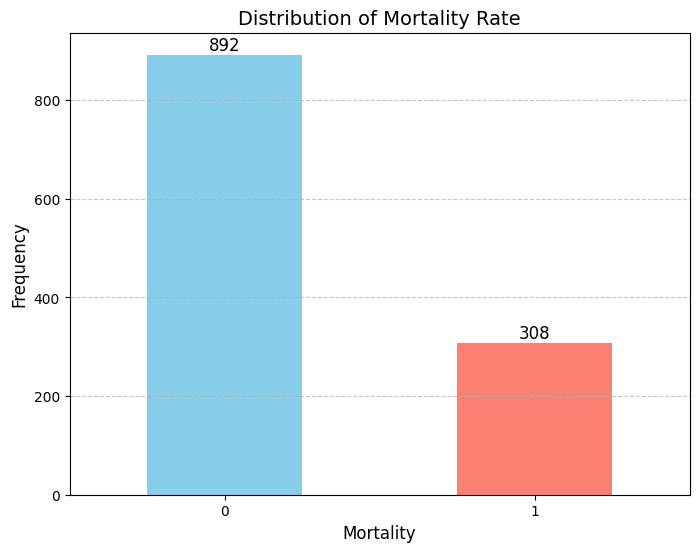

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Get the counts of each category
value_counts = df['Mortality'].value_counts()

# Create a bar graph with different colors
colors = ['skyblue', 'salmon']  # Adjust colors as needed
ax = value_counts.plot(kind='bar', color=colors, figsize=(8, 6))

# Add values on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)

# Customize the plot
plt.title('Distribution of Mortality Rate', fontsize=14)
plt.xlabel('Mortality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0, fontsize=10)  # Rotate the x-axis labels if needed
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

### **Summary Statisticss**

In [ ]:
df.describe()

,Maternal_Age,Prenatal_Visits,Birth_Weight_kg,Gestational_Age_weeks,Maternal_Health_Score,Socioeconomic_Status,Delivery_Method,Multiple_Birth,Maternal_Nutrition_Score,Mortality
count,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,30.007500,4.73500,3.247200,34.959167,5.840817,2.610000,0.742500,0.074167,5.634458,0.256667
std,8.473426,2.79785,0.582836,4.026083,2.509965,1.100262,0.437439,0.262151,2.587568,0.436976
min,16.000000,0.00000,1.170000,28.000000,1.010000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,22.000000,2.00000,2.840000,31.000000,3.790000,2.000000,0.000000,0.000000,3.457500,0.000000
50%,30.000000,5.00000,3.260000,35.000000,6.045000,3.000000,1.000000,0.000000,5.690000,0.000000
75%,37.000000,7.00000,3.660000,39.000000,7.905000,4.000000,1.000000,0.000000,7.820000,1.000000
max,44.000000,9.00000,5.300000,41.000000,10.000000,4.000000,1.000000,1.000000,10.000000,1.000000


### **Grouped Summary Statistics**

In [ ]:
grouped_custom_stats = df.groupby('Mortality')[['Maternal_Age', 'Birth_Weight_kg', 'Gestational_Age_weeks']].agg(['mean', 'median', 'std', 'min', 'max'])
grouped_custom_stats

Maternal_Age                          Birth_Weight_kg         \
                  mean median       std min max            mean median   
Mortality                                                                
0            29.639013   30.0  8.384005  16  44        3.273195   3.28   
1            31.074675   32.0  8.652781  16  44        3.171916   3.18   

                                Gestational_Age_weeks                           
                std   min   max                  mean median       std min max  
Mortality                                                                       
0          0.569411  1.17  4.95             35.429372   36.0  3.931306  28  41  
1          0.614859  1.45  5.30             33.597403   33.0  3.993512  28  41

### **Distribution of Features Across Target Variablee**

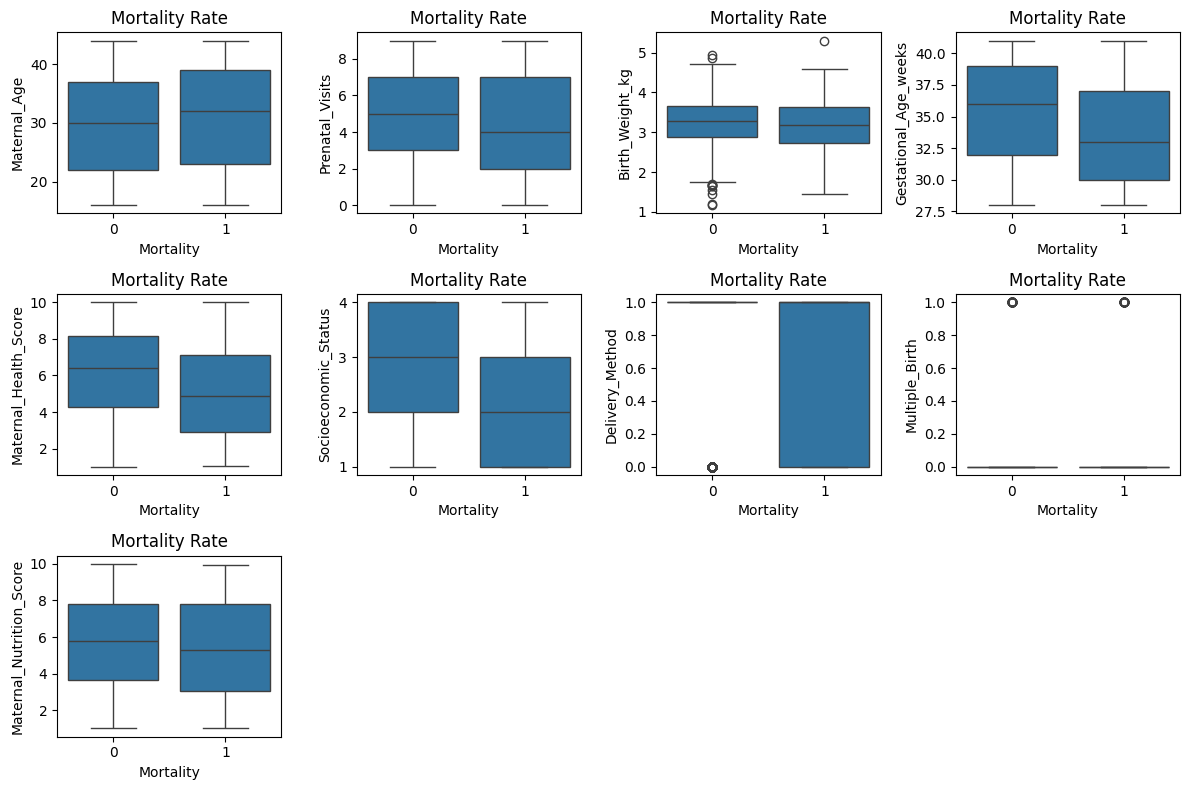

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your features are in a DataFrame called `data` and the dependent variable is 'target'

# Combine features and target into one DataFrame for easy plotting
df['Mortality'] = df['Mortality']  # Replace 'target' with the actual column name for the dependent variable

# Calculate the number of rows and columns for subplots based on the number of features
num_features = len(df.columns) - 1  # Exclude the 'Target' column
ncols = 4  # You can adjust this to your preference
nrows = (num_features // ncols) + (num_features % ncols > 0)

# Set the size of the figure for better clarity
plt.figure(figsize=(12, 8))

# Create boxplots for each feature by target class
for idx, column in enumerate(df.columns[:-1]):  # Exclude the Target column
    plt.subplot(nrows, ncols, idx + 1)  # Adjust subplot based on number of features
    sns.boxplot(data=df, x='Mortality', y=column)
    plt.title(f'Mortality Rate')

plt.tight_layout()
plt.show()


### **Check Zero and Near Zero Variance**
#### **Near Zero Variance**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
X = df.drop(df.columns[9], axis=1)
selector = VarianceThreshold(threshold=1e-4)

# Fit the model to find near-zero variance predictors
selector.fit(X)

# Get the boolean mask indicating which columns have non-zero variance
non_zero_variance_mask = selector.get_support()

# Create a DataFrame showing the variance metrics
nzv_metrics = pd.DataFrame({
    'Feature': X.columns,
    'Variance': X.var(),
    'NearZeroVariance': ~non_zero_variance_mask  # True if near-zero variance
})
nzv_metrics

,Feature,Variance,NearZeroVariance
Maternal_Age,Maternal_Age,71.798943,False
Prenatal_Visits,Prenatal_Visits,7.827965,False
Birth_Weight_kg,Birth_Weight_kg,0.339698,False
Gestational_Age_weeks,Gestational_Age_weeks,16.209340,False
Maternal_Health_Score,Maternal_Health_Score,6.299922,False
Socioeconomic_Status,Socioeconomic_Status,1.210575,False
Delivery_Method,Delivery_Method,0.191353,False
Multiple_Birth,Multiple_Birth,0.068723,False
Maternal_Nutrition_Score,Maternal_Nutrition_Score,6.695508,False


### **Zero Variance**

In [ ]:
import pandas as pd
X = df.drop(df.columns[9], axis=1)  # Dropping the 17th column

# Calculate variance for each feature
variance = X.var()

# Identify zero variance predictors
zero_variance_mask = variance == 0

# Create a DataFrame showing the variance metrics
variance_metrics = pd.DataFrame({
    'Feature': X.columns,
    'Variance': variance,
    'ZeroVariance': zero_variance_mask  # True if zero variance
})

# Print the results
variance_metrics[variance_metrics['ZeroVariance'] == True]

,Feature,Variance,ZeroVariance


### **Data Partitioning for Machine Learning**

In [ ]:
X = df.drop('Mortality', axis=1)
y = df['Mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **View the Available Machine Learning Model in Python**

In [ ]:
from sklearn.utils import all_estimators
# Get all classifiers and regressors
estimators = all_estimators()
# Extract the names of the models
model_names = [name for name, _ in estimators]
# Display the list of model names
print(model_names)

['ARDRegression', 'AdaBoostClassifier', 'AdaBoostRegressor', 'AdditiveChi2Sampler', 'AffinityPropagation', 'AgglomerativeClustering', 'BaggingClassifier', 'BaggingRegressor', 'BayesianGaussianMixture', 'BayesianRidge', 'BernoulliNB', 'BernoulliRBM', 'Binarizer', 'Birch', 'BisectingKMeans', 'CCA', 'CalibratedClassifierCV', 'CategoricalNB', 'ClassifierChain', 'ColumnTransformer', 'ComplementNB', 'CountVectorizer', 'DBSCAN', 'DecisionTreeClassifier', 'DecisionTreeRegressor', 'DictVectorizer', 'DictionaryLearning', 'DummyClassifier', 'DummyRegressor', 'ElasticNet', 'ElasticNetCV', 'EllipticEnvelope', 'EmpiricalCovariance', 'ExtraTreeClassifier', 'ExtraTreeRegressor', 'ExtraTreesClassifier', 'ExtraTreesRegressor', 'FactorAnalysis', 'FastICA', 'FeatureAgglomeration', 'FeatureHasher', 'FeatureUnion', 'FixedThresholdClassifier', 'FrozenEstimator', 'FunctionTransformer', 'GammaRegressor', 'GaussianMixture', 'GaussianNB', 'GaussianProcessClassifier', 'GaussianProcessRegressor', 'GaussianRandomPr

### **K-Nearest Neighbors (KNN)**
#### 1. What is KNN?
KNN is a **lazy learning** algorithm used for both classification and regression. It makes predictions based on the **k closest data points** (neighbors) in the training set.

- **Classification**: Predict the *majority class* among the k neighbors  
- **Regression**: Predict the *average value* of the k neighbors

> 💡 **Key idea**: "Tell me who your neighbors are, and I'll tell you who you are."

---

#### 2. Distance Metrics (How we measure "closeness")

For two points **x = (x₁, x₂, ..., xₚ)** and **y = (y₁, y₂, ..., yₚ)** in *p*-dimensional space:

| Metric | Formula | When to use |
|--------|---------|-------------|
| **Euclidean** | $d(x,y) = \sqrt{\sum_{i=1}^{p}(x_i - y_i)^2}$ | Default choice; works well when features are on similar scales |
| **Manhattan** | $d(x,y) = \sum_{i=1}^{p}\|x_i - y_i\|$ | Better for grid-like paths or high-dimensional data |

> ⚠️ **Always standardize features** before KNN (e.g., using `StandardScaler`) because distance is sensitive to feature scales.

---

#### 3. KNN Classification – Simple Math

Given a new point **x₀**:

1. Compute distance from **x₀** to all training points
2. Find the **k** nearest neighbors
3. Predict the class with highest frequency:

$$
\hat{y}_0 = \text{mode}\{y_i : x_i \in \mathcal{N}_k(x_0)\}
$$

where $\mathcal{N}_k(x_0)$ = set of k nearest neighbors of $x_0$

---

#### 4. KNN Regression – Simple Math

Predict the average target value of the k neighbors:

$$
\hat{y}_0 = \frac{1}{k} \sum_{x_i \in \mathcal{N}_k(x_0)} y_i
$$

*(Weighted versions give closer neighbors more influence)*

---

#### 5. Choosing k – The Bias-Variance Tradeoff

| Small k (e.g., k=1) | Large k (e.g., k=n) |
|---------------------|---------------------|
| ✅ Low bias<br>❌ High variance (overfitting) | ✅ Low variance<br>❌ High bias (underfitting) |
| Sensitive to noise | Smoother decision boundaries |

✅ **Rule of thumb**: Try odd values of k (to avoid ties in classification) and use cross-validation to pick the best k.

---

#### 6. Pros & Cons

| ✅ Pros | ❌ Cons |
|--------|---------|
| Simple to understand & implement | Computationally expensive at prediction time (must scan entire dataset) |
| No training phase (just stores data) | Sensitive to irrelevant/noisy features |
| Works well with small datasets | Requires feature scaling |
| Naturally handles multi-class problems | Struggles in high dimensions ("curse of dimensionality") |

### 🔑 Key Takeaways

1. KNN = memorize training data → find closest neighbors → vote/average
2. **Always scale features** before using KNN
3. Small k → complex model (risk overfitting)  
   Large k → simple model (risk underfitting)
4. No explicit "training" – all computation happens at prediction time
5. Best for small-to-medium datasets with low dimensionality

> 💡 **Homework idea**: Try changing `n_neighbors` from 1 to 15 and plot accuracy vs. k to see the bias-variance tradeoff in action!

In [ ]:
### View the Shape of the Train and Test Dataset
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (840, 9)
X_test shape: (360, 9)
y_train shape: (840,)
y_test shape: (360,)


#### **Fit the KNN Model**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

#### **Confirm the Number of Features in the Model**

In [ ]:
print("Number of features used:", X_train_scaled.shape[1])
print("Feature names:", X.columns.tolist())

Number of features used: 9
Feature names: ['Maternal_Age', 'Prenatal_Visits', 'Birth_Weight_kg', 'Gestational_Age_weeks', 'Maternal_Health_Score', 'Socioeconomic_Status', 'Delivery_Method', 'Multiple_Birth', 'Maternal_Nutrition_Score']


In [ ]:
params_dict = knn.get_params()
params_df = pd.DataFrame(list(params_dict.items()), columns=['Parameter', 'Value'])
print("KNN Model Parameters:")
params_df

KNN Model Parameters:


,Parameter,Value
0,algorithm,auto
1,leaf_size,30
2,metric,minkowski
3,metric_params,None
4,n_jobs,None
5,n_neighbors,5
6,p,2
7,weights,uniform


### **Obtain the Model's Prediction Accuracy**

In [ ]:
# 5. Predict & evaluate
y_pred = knn.predict(X_test_scaled)
print(f"Accuracy with k=5: {accuracy_score(y_test, y_pred):.2f}")

Accuracy with k=5: 0.76


#### **Obtain the Confusion Matrix**

Confusion Matrix:
[[249  22]
 [ 63  26]]


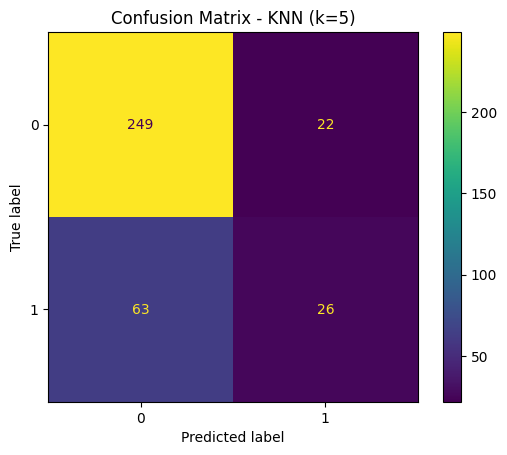

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Make predictions
y_pred = knn.predict(X_test_scaled)

# 2. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# 3. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - KNN (k=5)")
plt.show()

#### **Features Importance Plot**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
feature_names = X.columns  # all 11 features

result = permutation_importance(
    knn,
    X_test_scaled,
    y_test,
    n_repeats=20,
    random_state=42
)

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": result.importances_mean,
    "Std": result.importances_std
})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print(importance_df.to_string(index=False))

                 Feature  Importance      Std
         Delivery_Method    0.050833 0.011756
   Gestational_Age_weeks    0.019583 0.015750
    Socioeconomic_Status    0.015556 0.010334
          Multiple_Birth    0.014306 0.006932
         Prenatal_Visits    0.013472 0.009871
Maternal_Nutrition_Score    0.012917 0.009308
            Maternal_Age    0.010417 0.012072
         Birth_Weight_kg    0.010417 0.009332
   Maternal_Health_Score    0.008611 0.010353


#### **Plot Features Importance**

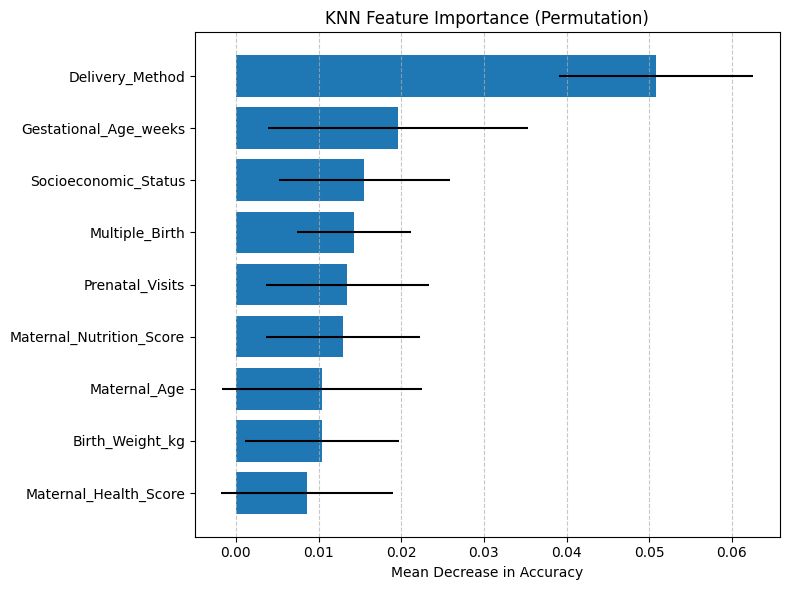

In [ ]:
plt.figure(figsize=(8,6))
plt.barh(importance_df["Feature"], importance_df["Importance"], xerr=importance_df["Std"])
plt.xlabel("Mean Decrease in Accuracy")
plt.title("KNN Feature Importance (Permutation)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### **Model Performance Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1] # Get probabilities for the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0) # zero_division=0 handles cases where no positive predictions are made
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [ ]:
# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})
metrics_df

,Metric,Score
0,Accuracy,0.763889
1,Precision,0.541667
2,Recall,0.292135
3,F1-Score,0.379562
4,ROC AUC,0.706476


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Live Birth","Mortality"]))

              precision    recall  f1-score   support

  Live Birth       0.80      0.92      0.85       271
   Mortality       0.54      0.29      0.38        89

    accuracy                           0.76       360
   macro avg       0.67      0.61      0.62       360
weighted avg       0.73      0.76      0.74       360



### **Additional Performance Metrics**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.contingency_tables import mcnemar

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix values
TN, FP, FN, TP = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred)

# Specificity
specificity = TN / (TN + FP)

# Positive Predictive Value (Precision)
ppv = precision_score(y_test, y_pred)

# Negative Predictive Value
npv = TN / (TN + FN)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
# No Information Rate (NIR)
nir = y_test.value_counts().max() / len(y_test)

# McNemar's Test P-Value
mcnemar_result = mcnemar(cm)
mcnemar_p_value = mcnemar_result.pvalue

# Balanced Accuracy
balanced_accuracy = (sensitivity + specificity) / 2

In [ ]:
# Print the results
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Positive Predictive Value: {ppv:.4f}")
print(f"Negative Predictive Value: {npv:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"No Information Rate (NIR): {nir:.4f}")
#print(f"P-Value [Acc > NIR]: {p_value_acc_nir:.7f}")
print(f"McNemar's Test P-Value: {mcnemar_p_value:.7f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

Confusion Matrix:
[[249  22]
 [ 63  26]]
Accuracy: 0.7639
Sensitivity: 0.2921
Specificity: 0.9188
Positive Predictive Value: 0.5417
Negative Predictive Value: 0.7981
F1 Score: 0.3796
Cohen's Kappa: 0.2496
No Information Rate (NIR): 0.7528
McNemar's Test P-Value: 0.0000098
Balanced Accuracy: 0.6055


#### **ROC andd AUC Curve**

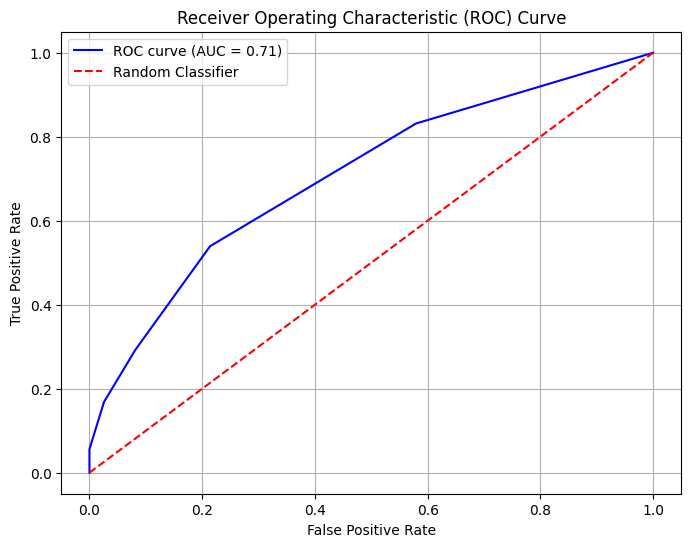

AUC for KNN Model: 0.7065


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC for KNN Model: {auc_score:.4f}")

### **Decision Boundary using the First Two Important Features**

In [ ]:
# Sort features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Select top 2 features
top2_features = importance_df["Feature"].values[:2]
print("Top 2 features:", top2_features)

Top 2 features: ['Delivery_Method' 'Gestational_Age_weeks']


In [ ]:
X_top2 = X[top2_features].values  # Keep only the two most important features

In [ ]:
scaler_2 = StandardScaler()
X_top2_scaled = scaler_2.fit_transform(X_top2)

# Train-test split
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_top2_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_train_2, y_train_2)

KNeighborsClassifier()

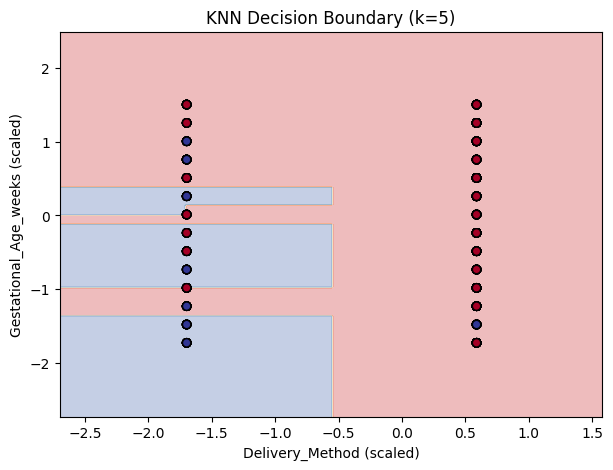

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, feature_names):
    h = 0.02  # step size in mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict for each point in the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='RdYlBu')
    plt.xlabel(feature_names[0] + " (scaled)")
    plt.ylabel(feature_names[1] + " (scaled)")
    plt.title(f"KNN Decision Boundary (k={model.n_neighbors})")
    plt.show()

# Plot using top 2 important features
plot_decision_boundary(knn_2, X_train_2, y_train_2, top2_features)

## **KNN Model with Medical In-Built Data for Classification**

#### **Load the Iris dataset.**

Load the Iris dataset using scikit-learn's `load_iris` function.


Load the Iris dataset by importing `load_iris` from `sklearn.datasets`, calling it, and then extracting the feature data and target labels into `X_iris` and `y_iris` respectively. Finally, print the dataset's description.



In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Access feature data and target labels
X_iris = iris.data
y_iris = iris.target

In [ ]:
# Print the dataset description
print(f"\nShape of X_iris: {X_iris.shape}")
print(f"Shape of y_iris: {y_iris.shape}")


Shape of X_iris: (150, 4)
Shape of y_iris: (150,)


#### **Descriptive Statistics***

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

##### **Data Preprocessing and Cleaning**
Prepare the Iris dataset for modeling, including feature scaling. Given the Iris dataset's nature, extensive cleaning might not be necessary, but scaling is crucial for KNN.


This requires scaling the Iris dataset features using `StandardScaler`. I will import `StandardScaler`, instantiate it, and then apply `fit_transform` to `X_iris` to get `X_iris_scaled`.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler_iris = StandardScaler()

# Apply scaling to X_iris
X_iris_scaled = scaler_iris.fit_transform(X_iris)

print("Iris dataset features scaled successfully.")
print(f"Shape of X_iris_scaled: {X_iris_scaled.shape}")

Iris dataset features scaled successfully.
Shape of X_iris_scaled: (150, 4)


#### **Data Visualization**
Visualize the Iris dataset to understand the distribution of features and classes, potentially using scatter plots or pair plots.


To visualize the Iris dataset, I will first combine the scaled features and target variable into a single Pandas DataFrame. Then, I will map the numerical target labels to descriptive class names for clarity. Finally, I will generate a pair plot using Seaborn to show the distribution of features and class separation.



<Figure size 1000x800 with 0 Axes>

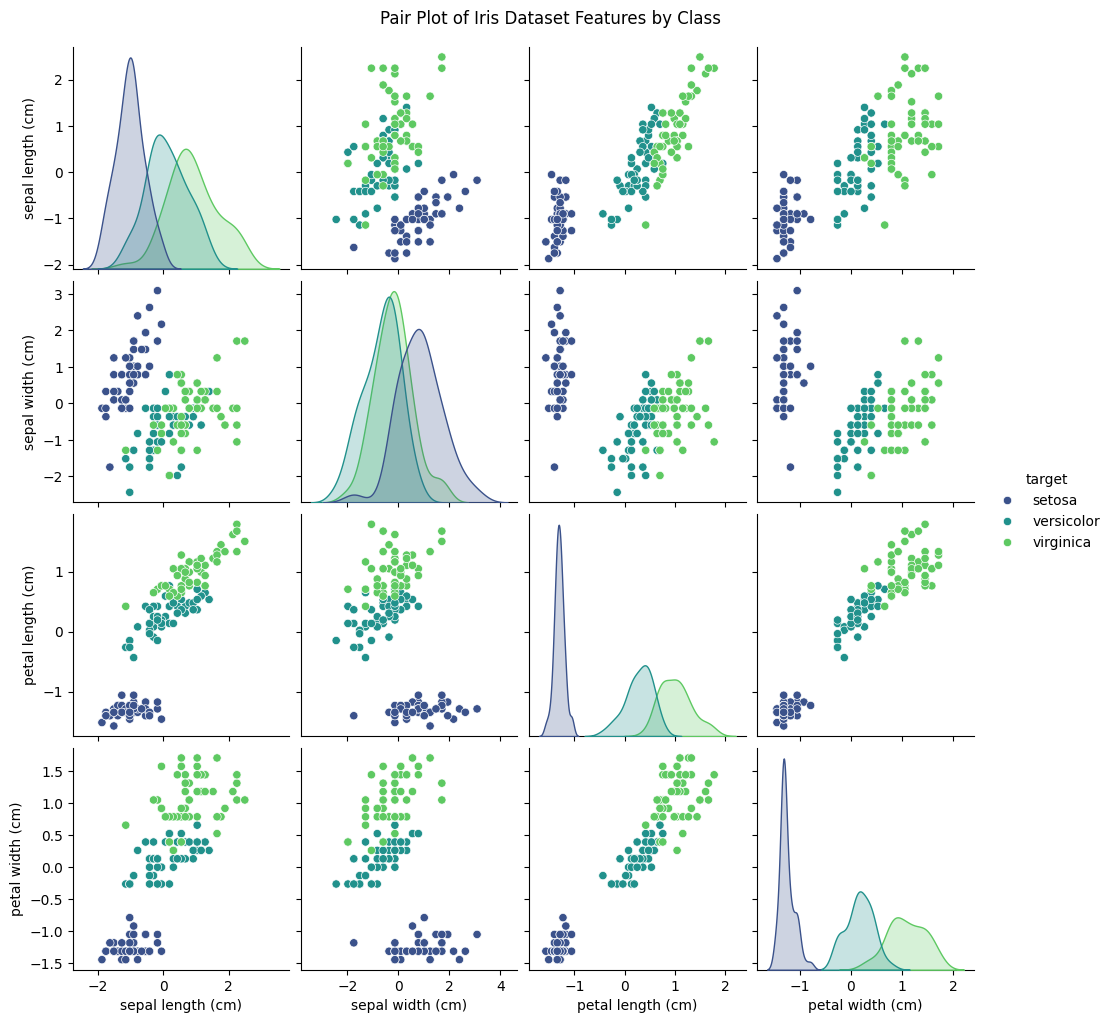

Pair plot generated successfully, showing feature distributions and class separation.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the scaled features
iris_df = pd.DataFrame(X_iris_scaled, columns=iris.feature_names)

# Add the target variable to the DataFrame
iris_df['target'] = y_iris

# Map numerical target labels to class names for better interpretability
target_names = iris.target_names
iris_df['target'] = iris_df['target'].map(lambda x: target_names[x])

# Create a pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(iris_df, hue='target', palette='viridis')
plt.suptitle('Pair Plot of Iris Dataset Features by Class', y=1.02)
plt.show()

print("Pair plot generated successfully, showing feature distributions and class separation.")

#### **Apply KNN Model**
Train a K-Nearest Neighbors classifier on the preprocessed Iris dataset and evaluate its performance.


To train and evaluate the KNN model, I will first split the preprocessed Iris dataset into training and testing sets, then instantiate and fit the KNN classifier, make predictions on the test set, and finally calculate the accuracy score to evaluate its performance.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Split the data into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris_scaled, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

# 2. Instantiate a KNeighborsClassifier with n_neighbors=5
knn_iris = KNeighborsClassifier(n_neighbors=5)

# 3. Fit the KNN model to the training data
knn_iris.fit(X_train_iris, y_train_iris)

# 4. Make predictions on the test features
y_pred_iris = knn_iris.predict(X_test_iris)

# 5. Evaluate the model's performance
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
print(f"KNN Model Accuracy on Iris Dataset: {accuracy_iris:.4f}")

KNN Model Accuracy on Iris Dataset: 0.9111


#### **Obtain the Performance Metrics**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Generate classification report
print("Classification Report for Iris KNN Model:\n")
print(classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names))

Classification Report for Iris KNN Model:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



In [ ]:
# Generate confusion matrix
cm_iris = confusion_matrix(y_test_iris, y_pred_iris)
print("\nConfusion Matrix for Iris KNN Model:\n")
print(cm_iris)


Confusion Matrix for Iris KNN Model:

[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]


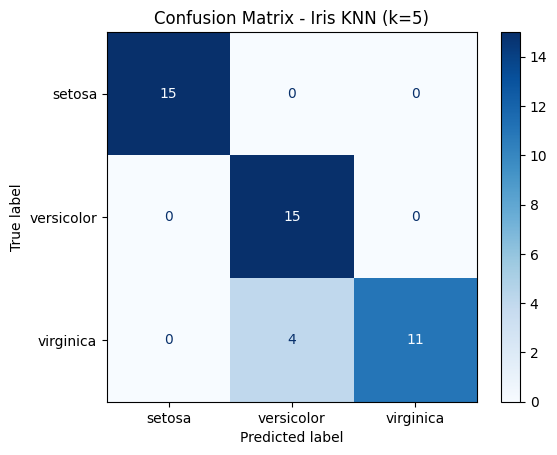

In [ ]:
# Plot confusion matrix
disp_iris = ConfusionMatrixDisplay(confusion_matrix=cm_iris, display_labels=iris.target_names)
disp_iris.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Iris KNN (k=5)")
plt.show()

#### **ROC and AUC Curve**

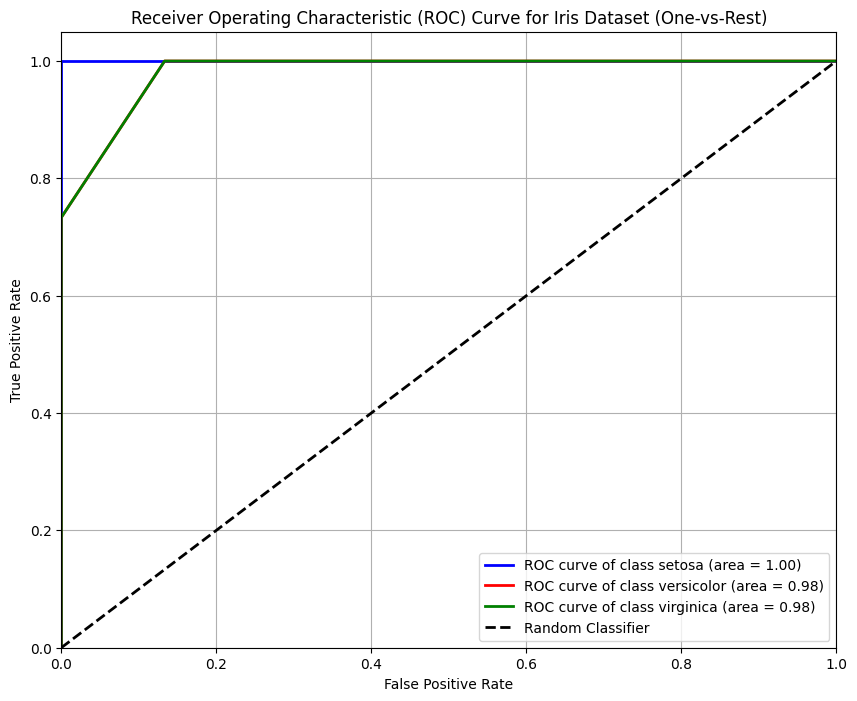

AUC scores per class:
  Class setosa: 1.0000
  Class versicolor: 0.9822
  Class virginica: 0.9822


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get prediction probabilities for each class
y_pred_proba_iris = knn_iris.predict_proba(X_test_iris)

# Binarize the true labels for multi-class ROC
n_classes = len(iris.target_names)
y_test_binarized = label_binarize(y_test_iris, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_iris[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green'] # Define colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {iris.target_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Iris Dataset (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("AUC scores per class:")
for i in range(n_classes):
    print(f"  Class {iris.target_names[i]}: {roc_auc[i]:.4f}")


#### **Plot Decision Boundary**
Visualize the decision boundary of the trained KNN model, focusing on two features for a clear 2D representation.


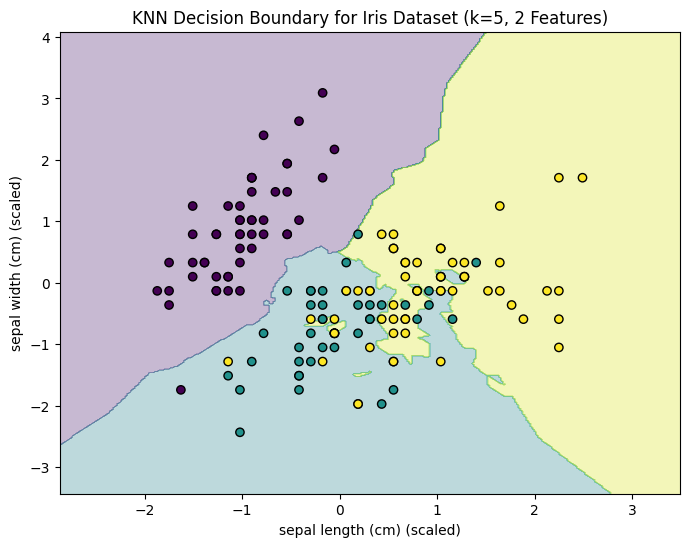

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def plot_decision_boundary(model, X, y, feature_names, title_suffix=""):
    # X is already scaled, so we just take the first two features for plotting
    X_plot = X[:, :2]

    h = 0.02  # step size in mesh

    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict for each point in the grid using the model trained on 2 features
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolor='k', cmap='viridis')
    plt.xlabel(feature_names[0] + " (scaled)")
    plt.ylabel(feature_names[1] + " (scaled)")
    plt.title(f"KNN Decision Boundary for Iris Dataset {title_suffix}")
    plt.show()

# Prepare data for plotting decision boundary with only 2 features
X_iris_2_features = X_iris_scaled[:, :2]

# Train-test split for the 2-feature data
X_train_iris_2, X_test_iris_2, y_train_iris_2, y_test_iris_2 = train_test_split(
    X_iris_2_features, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

# Train a new KNN model specifically on the first two features
knn_iris_2_features_model = KNeighborsClassifier(n_neighbors=5)
knn_iris_2_features_model.fit(X_train_iris_2, y_train_iris_2)

# Get the feature names for the first two features of the Iris dataset
iris_feature_names_for_plot = iris.feature_names[:2]

# Plot the decision boundary for the Iris dataset using the 2-feature model
plot_decision_boundary(knn_iris_2_features_model, X_iris_2_features, y_iris, iris_feature_names_for_plot, "(k=5, 2 Features)")

#### **KNN Model using Heart Failure Data**

In [ ]:
uploaded = files.upload()

Saving Heart.csv to Heart.csv


In [ ]:
df2 = pd.read_csv('Heart.csv')
df2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,HD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0


### **Variable Names, and Definition**

In [ ]:
import pandas as pd
from IPython.display import HTML, display

# Define the variables, their inferred definitions, and measurements for the Heart dataset
heart_variable_info = [
    {'Variable Name': 'Age', 'Definition': 'Age of the patient', 'Measurement': 'Integer (years)'},
    {'Variable Name': 'Sex', 'Definition': 'Sex of the patient', 'Measurement': 'Binary (1=Male, 0=Female)'},
    {'Variable Name': 'ChestPain', 'Definition': 'Type of chest pain experienced', 'Measurement': 'Categorical (e.g., typical angina, asymptomatic)'},
    {'Variable Name': 'RestBP', 'Definition': 'Resting blood pressure', 'Measurement': 'Integer (mm Hg)'},
    {'Variable Name': 'Chol', 'Definition': 'Serum cholesterol level', 'Measurement': 'Integer (mg/dl)'},
    {'Variable Name': 'Fbs', 'Definition': 'Fasting blood sugar > 120 mg/dl', 'Measurement': 'Binary (1=True, 0=False)'},
    {'Variable Name': 'RestECG', 'Definition': 'Resting electrocardiographic results', 'Measurement': 'Categorical (0, 1, 2)'},
    {'Variable Name': 'MaxHR', 'Definition': 'Maximum heart rate achieved', 'Measurement': 'Integer (bpm)'},
    {'Variable Name': 'ExAng', 'Definition': 'Exercise induced angina', 'Measurement': 'Binary (1=Yes, 0=No)'},
    {'Variable Name': 'Oldpeak', 'Definition': 'ST depression induced by exercise relative to rest', 'Measurement': 'Float'},
    {'Variable Name': 'Slope', 'Definition': 'The slope of the peak exercise ST segment', 'Measurement': 'Categorical (1=upsloping, 2=flat, 3=downsloping)'},
    {'Variable Name': 'Ca', 'Definition': 'Number of major vessels (0-3) colored by fluoroscopy', 'Measurement': 'Integer'},
    {'Variable Name': 'Thal', 'Definition': 'Thallium stress test result', 'Measurement': 'Categorical (e.g., normal, fixed defect)'},
    {'Variable Name': 'AHD', 'Definition': 'Diagnosis of heart disease (original categorical)', 'Measurement': 'Binary (Yes/No)'},
    {'Variable Name': 'HD', 'Definition': 'Diagnosis of heart disease (numeric target variable)', 'Measurement': 'Binary (1=Yes, 0=No)'}
]

# Create a DataFrame
heart_variables_df = pd.DataFrame(heart_variable_info)

# Display the DataFrame as HTML
display(HTML(heart_variables_df.to_html(index=False)))

Variable Name,Definition,Measurement
Age,Age of the patient,Integer (years)
Sex,Sex of the patient,"Binary (1=Male, 0=Female)"
ChestPain,Type of chest pain experienced,"Categorical (e.g., typical angina, asymptomatic)"
RestBP,Resting blood pressure,Integer (mm Hg)
Chol,Serum cholesterol level,Integer (mg/dl)
Fbs,Fasting blood sugar > 120 mg/dl,"Binary (1=True, 0=False)"
RestECG,Resting electrocardiographic results,"Categorical (0, 1, 2)"
MaxHR,Maximum heart rate achieved,Integer (bpm)
ExAng,Exercise induced angina,"Binary (1=Yes, 0=No)"
Oldpeak,ST depression induced by exercise relative to rest,Float


#### **Data Preparation**

*   **Initial Data Inspection**: Inspect the data types, non-null counts, and overall structure of the Heart dataset using `.info()` and `.head()`.
*   **Handle Missing Values**: Identify and address any missing values in the dataset, especially in columns like 'Ca' and 'Thal' which might contain non-numeric placeholders.
*   **Convert Categorical Variables**: Transform categorical features ('ChestPain', 'Thal', 'AHD') into numerical representations using appropriate encoding techniques (e.g., one-hot encoding or label encoding).
*   **Feature Scaling**: Apply feature scaling (e.g., StandardScaler) to numerical features to ensure all features contribute equally to the model, which is crucial for distance-based algorithms like KNN.

Next, I'll display the `.info()` for the `df2` (Heart.csv) DataFrame to inspect its structure and data types.


Inspect the data types, non-null counts, and overall structure of the Heart dataset using `.info()` and `.head()`.


Inspect the Heart dataset (`df2`) by displaying its first 5 rows and then printing a concise summary, including data types and non-null counts, using `.head()` and `.info()` respectively.



In [ ]:
print("First 5 rows of the Heart dataset:")
df2.head()

First 5 rows of the Heart dataset:


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,HD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0


In [ ]:
print("\nConcise summary of the Heart dataset:")
df2.info()


Concise summary of the Heart dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
 14  HD         303 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


#### **Handle Missing Values**
Identify and address any missing values in the dataset, especially in columns like 'Ca' and 'Thal' which might contain non-numeric placeholders.


The first step is to identify the number of missing values in each column of the `df2` DataFrame to understand the extent of missing data, which is done using `df2.isnull().sum()`.



In [ ]:
print("Missing values before cleaning:")
df2.isnull().sum()

Missing values before cleaning:


,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


Before converting non-numeric values to NaN and imputing, I need to inspect the unique values in the 'Ca' and 'Thal' columns to confirm the presence of any non-numeric placeholders like '?'.



In [ ]:
print("Unique values in 'Ca' column before cleaning:")
print(df2['Ca'].unique())

print("\nUnique values in 'Thal' column before cleaning:")
print(df2['Thal'].unique())

Unique values in 'Ca' column before cleaning:
[ 0.  3.  2.  1. nan]

Unique values in 'Thal' column before cleaning:
['fixed' 'normal' 'reversable' nan]


Since the previous step confirmed that 'Ca' and 'Thal' columns already have `nan` values (and no other non-numeric placeholders like '?') and they are numerical and categorical respectively, I will impute the missing values in 'Ca' with its median and in 'Thal' with its mode.



In [ ]:
df2['Ca'].fillna(df2['Ca'].median(), inplace=True)
df2['Thal'].fillna(df2['Thal'].mode()[0], inplace=True)

print("Missing values after imputation:")
print(df2.isnull().sum())

Missing values after imputation:
Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
HD           0
dtype: int64


/tmp/ipython-input-3050379789.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Ca'].fillna(df2['Ca'].median(), inplace=True)
/tmp/ipython-input-3050379789.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

**Reasoning**:
The previous code generated a `FutureWarning` regarding the use of `inplace=True` in chained assignments. To resolve this, I will update the `.fillna()` calls to assign the results back to the DataFrame columns directly, which is the recommended practice for modifying DataFrames and avoids potential issues with copies.



In [ ]:
df2['Ca'] = df2['Ca'].fillna(df2['Ca'].median())
df2['Thal'] = df2['Thal'].fillna(df2['Thal'].mode()[0])

print("Missing values after imputation:")
print(df2.isnull().sum())

Missing values after imputation:
Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
HD           0
dtype: int64


Transform categorical features ('ChestPain', 'Thal', 'AHD') into numerical representations using appropriate encoding techniques (e.g., one-hot encoding).


**Reasoning**:
To prepare the categorical features ('ChestPain', 'Thal', 'AHD') for machine learning, I will apply one-hot encoding using `pd.get_dummies`. This will convert these columns into numerical representations.



In [ ]:
df2 = pd.get_dummies(df2, columns=['ChestPain', 'Thal', 'AHD'], drop_first=True)
print("DataFrame after one-hot encoding categorical variables:")
df2.head()

DataFrame after one-hot encoding categorical variables:


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,HD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,False,False,True,False,False,False
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,False,False,False,True,False,True
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,False,False,False,False,True,True
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,True,False,False,True,False,False
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,False,True,False,True,False,False


#### **Feature Scaling**
Apply feature scaling (e.g., StandardScaler) to numerical features to ensure all features contribute equally to the model, which is crucial for distance-based algorithms like KNN.

**Reasoning**:
To prepare for feature scaling, I need to identify the target variable ('HD') and separate it from the features. Then, I will apply `StandardScaler` to the remaining numerical features in the DataFrame.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X_heart = df2.drop('HD', axis=1)
y_heart = df2['HD']

# Identify numerical columns for scaling (exclude one-hot encoded boolean columns for now, they are already 0/1)
# We'll scale all columns that are not boolean or the target variable.
numerical_cols = X_heart.select_dtypes(include=['int64', 'float64']).columns

# Instantiate StandardScaler
scaler_heart = StandardScaler()

# Apply scaling to the numerical features
X_heart[numerical_cols] = scaler_heart.fit_transform(X_heart[numerical_cols])

print("Heart dataset features scaled successfully.")
print(X_heart.head())

Heart dataset features scaled successfully.
        Age       Sex    RestBP      Chol       Fbs   RestECG     MaxHR  \
0  0.948726  0.686202  0.757525 -0.264900  2.394438  1.016684  0.017197   
1  1.392002  0.686202  1.611220  0.760415 -0.417635  1.016684 -1.821905   
2  1.392002  0.686202 -0.665300 -0.342283 -0.417635  1.016684 -0.902354   
3 -1.932564  0.686202 -0.096170  0.063974 -0.417635 -0.996749  1.637359   
4 -1.489288 -1.457296 -0.096170 -0.825922 -0.417635  1.016684  0.980537   

      ExAng   Oldpeak     Slope        Ca  ChestPain_nonanginal  \
0 -0.696631  1.087338  2.274579 -0.711131                 False   
1  1.435481  0.397182  0.649113  2.504881                 False   
2  1.435481  1.346147  0.649113  1.432877                 False   
3 -0.696631  2.122573  2.274579 -0.711131                  True   
4 -0.696631  0.310912 -0.976352 -0.711131                 False   

   ChestPain_nontypical  ChestPain_typical  Thal_normal  Thal_reversable  \
0                 False   

#### **Data Partitioning**
Split the preprocessed Heart dataset into training and testing sets to prepare for model training and evaluation.

**Reasoning**:
Now that the data has been preprocessed (missing values handled, categorical variables encoded, and numerical features scaled), the next step is to split the dataset into training and testing sets. This will allow for proper evaluation of the KNN model on unseen data.



In [ ]:
from sklearn.model_selection import train_test_split

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart, y_heart, test_size=0.3, random_state=42, stratify=y_heart
)

print("Heart dataset split into training and testing sets successfully.")
print(f"X_train_heart shape: {X_train_heart.shape}")
print(f"X_test_heart shape: {X_test_heart.shape}")
print(f"y_train_heart shape: {y_train_heart.shape}")
print(f"y_test_heart shape: {y_test_heart.shape}")

Heart dataset split into training and testing sets successfully.
X_train_heart shape: (212, 17)
X_test_heart shape: (91, 17)
y_train_heart shape: (212,)
y_test_heart shape: (91,)


#### **Apply KNN Model to Heart Dataset**
Train a K-Nearest Neighbors classifier on the preprocessed Heart dataset and evaluate its performance.

**Reasoning**:
To train the KNN model for the Heart dataset, I will instantiate `KNeighborsClassifier` with a chosen `n_neighbors` value (e.g., 5), and then fit this model using the `X_train_heart` and `y_train_heart` data.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Instantiate a KNeighborsClassifier with n_neighbors=5
knn_heart = KNeighborsClassifier(n_neighbors=5)

# 2. Fit the KNN model to the training data
knn_heart.fit(X_train_heart, y_train_heart)

print("KNN model trained successfully on the Heart dataset.")

KNN model trained successfully on the Heart dataset.


**Reasoning**:
Now that the KNN model for the Heart dataset has been trained, the next logical step is to evaluate its performance by making predictions on the test set and calculating the accuracy.



In [ ]:
from sklearn.metrics import accuracy_score

# 3. Make predictions on the test features
y_pred_heart = knn_heart.predict(X_test_heart)

# 4. Evaluate the model's performance
accuracy_heart = accuracy_score(y_test_heart, y_pred_heart)
print(f"KNN Model Accuracy on Heart Dataset: {accuracy_heart:.4f}")

KNN Model Accuracy on Heart Dataset: 0.8901


**Reasoning**:
To get a more detailed understanding of the model's performance beyond just accuracy, I will generate a classification report that includes precision, recall, and F1-score for each class.



In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
print("Classification Report for Heart KNN Model:\n")
print(classification_report(y_test_heart, y_pred_heart, target_names=['No Heart Disease', 'Heart Disease']))

Classification Report for Heart KNN Model:

                  precision    recall  f1-score   support

No Heart Disease       0.90      0.90      0.90        49
   Heart Disease       0.88      0.88      0.88        42

        accuracy                           0.89        91
       macro avg       0.89      0.89      0.89        91
    weighted avg       0.89      0.89      0.89        91



**Reasoning**:
To further evaluate the KNN model's performance on the Heart dataset, I will generate and display a confusion matrix. This will provide a visual breakdown of correct and incorrect classifications for each class.




Confusion Matrix for Heart KNN Model:

[[44  5]
 [ 5 37]]


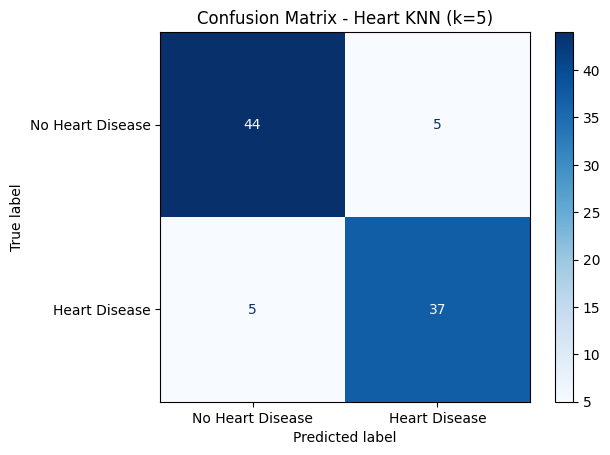

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm_heart = confusion_matrix(y_test_heart, y_pred_heart)
print("\nConfusion Matrix for Heart KNN Model:\n")
print(cm_heart)

# Plot confusion matrix
disp_heart = ConfusionMatrixDisplay(confusion_matrix=cm_heart, display_labels=['No Heart Disease', 'Heart Disease'])
disp_heart.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Heart KNN (k=5)")
plt.show()

### **Obtain the Features Importance Plot**

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

# 1. Obtain the feature names from the X_heart DataFrame
feature_names_heart = X_heart.columns

# 2. Calculate permutation importance
result_heart = permutation_importance(
    knn_heart,
    X_test_heart,
    y_test_heart,
    n_repeats=20,
    random_state=42,
    n_jobs=-1 # Use all available CPU cores
)

# 3. Create a Pandas DataFrame to store the results
importance_df_heart = pd.DataFrame({
    "Feature": feature_names_heart,
    "Importance": result_heart.importances_mean,
    "Std": result_heart.importances_std
})

# 4. Sort the DataFrame by 'Importance' in descending order and print it
importance_df_heart = importance_df_heart.sort_values(by="Importance", ascending=False)

print("Feature Importance for KNN Model on Heart Dataset (Permutation Importance):")
print(importance_df_heart.to_string(index=False))

Feature Importance for KNN Model on Heart Dataset (Permutation Importance):
             Feature  Importance      Std
             AHD_Yes    0.059890 0.017880
                  Ca    0.048901 0.019184
               ExAng    0.048352 0.024424
               Slope    0.045604 0.014856
                 Sex    0.040659 0.017410
             Oldpeak    0.028571 0.020382
               MaxHR    0.018132 0.021778
                 Fbs    0.016484 0.020994
     Thal_reversable    0.014835 0.009996
         Thal_normal    0.004945 0.011247
             RestECG    0.003846 0.014019
ChestPain_nontypical    0.001099 0.003297
   ChestPain_typical    0.000000 0.000000
                Chol   -0.001648 0.014856
              RestBP   -0.003846 0.012175
ChestPain_nonanginal   -0.003846 0.009373
                 Age   -0.012637 0.013582


#### **Plot Features Importance for the Heart Dataset**

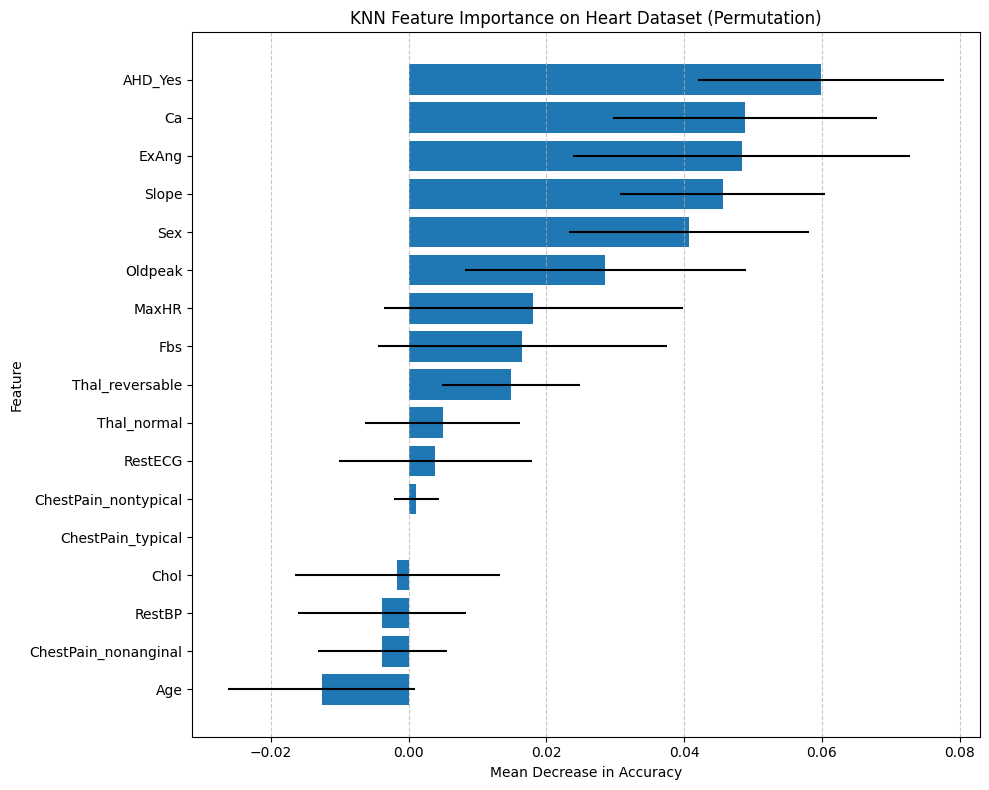

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
plt.barh(importance_df_heart["Feature"][::-1], importance_df_heart["Importance"][::-1], xerr=importance_df_heart["Std"][::-1])
plt.xlabel("Mean Decrease in Accuracy")
plt.ylabel("Feature")
plt.title("KNN Feature Importance on Heart Dataset (Permutation)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Support Vector Machines (SVM)**

In [ ]:
df2 = pd.read_csv('Heart.csv')
df2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,HD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0


#### **Train and Evaluate Support Vector Machine (SVM) Model**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Instantiate the SVM model
# Using a linear kernel initially. We can tune hyperparameters later if needed.
svm_model = SVC(kernel='linear', random_state=42, probability=True)

# 2. Train the SVM model on the training data
svm_model.fit(X_train_heart, y_train_heart)

print("SVM model trained successfully on the Heart dataset.")

SVM model trained successfully on the Heart dataset.


In [ ]:
# 3. Make predictions on the test features
y_pred_svm = svm_model.predict(X_test_heart)
y_pred_proba_svm = svm_model.predict_proba(X_test_heart)[:, 1]

# 4. Evaluate the model's performance
accuracy_svm = accuracy_score(y_test_heart, y_pred_svm)
print(f"\nSVM Model Accuracy on Heart Dataset: {accuracy_svm:.4f}")


SVM Model Accuracy on Heart Dataset: 1.0000


In [ ]:
# Generate classification report
print("\nClassification Report for Heart SVM Model:\n")
print(classification_report(y_test_heart, y_pred_svm, target_names=['No Heart Disease', 'Heart Disease']))

# Generate confusion matrix
cm_svm = confusion_matrix(y_test_heart, y_pred_svm)
print("\nConfusion Matrix for Heart SVM Model:\n")
print(cm_svm)


Classification Report for Heart SVM Model:

                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00        49
   Heart Disease       1.00      1.00      1.00        42

        accuracy                           1.00        91
       macro avg       1.00      1.00      1.00        91
    weighted avg       1.00      1.00      1.00        91


Confusion Matrix for Heart SVM Model:

[[49  0]
 [ 0 42]]


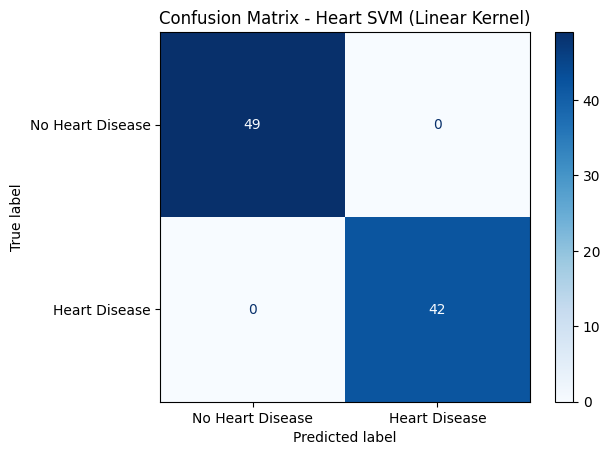

In [ ]:
# Plot confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['No Heart Disease', 'Heart Disease'])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Heart SVM (Linear Kernel)")
plt.show()